# **`Mục 1 — Data Understanding`**

**Mục tiêu**:
- Load dataset
- Kiểm tra tổng quan
- Thống kê mô tả
- Phân tích giá trị thiếu
- Kiểm tra phân phối Price & Area
- Phân tích tương quan
- Tách thử thông tin từ Address
---

# 1.1 Load Dataset

Đọc dữ liệu gốc từ thư mục `data/raw/`.  
Mục tiêu:
- Đọc đúng file CSV
- Kiểm tra dữ liệu có load thành công hay không
- Hiển thị 5 dòng đầu tiên để hình dung cấu trúc dữ liệu

In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/vietnam_housing_dataset.csv")
df.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


# 1.2 Kiểm tra kích thước và thông tin tổng quan

Chúng ta xem:
- Số dòng, số cột (`df.shape`)
- Kiểu dữ liệu của từng cột (`df.info()`)

Điều này giúp xác định cột số, cột chữ, và các vấn đề như:
- số lượng NaN
- kiểu dữ liệu không đúng


In [4]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (30229, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


# 1.3 Thống kê mô tả cho các biến số

Bảng thống kê mô tả giúp:
- Xem giá trị nhỏ nhất, lớn nhất
- Kiểm tra sự bất thường (outlier)
- Kiểm tra mức độ phân tán dữ liệu

Các chỉ số: mean, std, min, max, quartiles.


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Area,30229.0,68.498741,48.069835,3.1,40.0,56.0,80.0,595.0
Frontage,18665.0,5.361692,4.346174,1.0,4.0,4.5,5.0,77.0
Access Road,16932.0,7.853800,7.451313,1.0,4.0,6.0,10.0,85.0
Floors,26626.0,3.410426,1.328897,1.0,2.0,3.0,4.0,10.0
Bedrooms,25067.0,3.511030,1.309116,1.0,3.0,3.0,4.0,9.0
Bathrooms,23155.0,3.346837,1.400181,1.0,2.0,3.0,4.0,9.0
Price,30229.0,5.872078,2.211877,1.0,4.2,5.9,7.5,11.5


# 1.4 Kiểm tra giá trị thiếu (Missing Values)

Ở bước này:
- Tính tổng số giá trị thiếu theo cột
- Tính tỷ lệ phần trăm giá trị thiếu
- Sắp xếp giảm dần để xem cột thiếu nhiều nhất

Từ đó quyết định chiến lược xử lý: xóa, điền median, mode, hay bỏ cột.


In [6]:
missing = df.isna().sum()
missing_percent = (missing / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percent
}).sort_values("Missing %", ascending=False)

missing_table


,Missing Count,Missing %
Balcony direction,24983,82.65
House direction,21239,70.26
Furniture state,14119,46.71
Access Road,13297,43.99
Frontage,11564,38.25
Bathrooms,7074,23.40
Bedrooms,5162,17.08
Legal status,4506,14.91
Floors,3603,11.92
Area,0,0.00


# 1.5 Phân phối giá nhà (Price Distribution)

Mục tiêu:
- Xem dữ liệu `Price` có bị lệch phải hay không
- Phát hiện outlier giá lớn bất thường
- Quyết định có dùng log-transform sau này hay không

Chúng ta vẽ biểu đồ histogram + KDE.


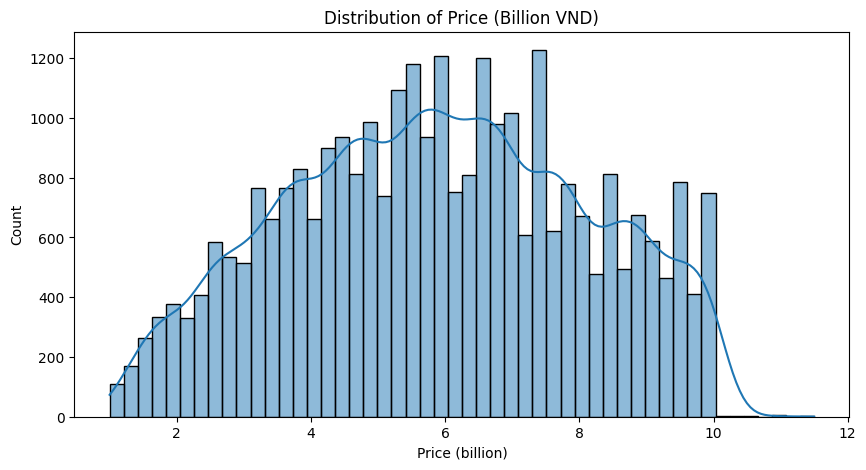

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Distribution of Price (Billion VND)")
plt.xlabel("Price (billion)")
plt.ylabel("Count")
plt.show()


# 1.6 Phân phối diện tích (Area Distribution)

Dữ liệu diện tích thường chứa:
- Các giá trị rất lớn (vài nghìn m2)
- Những bất thường (diện tích quá nhỏ như 1 m2)

Ta vẽ boxplot để kiểm tra outlier.


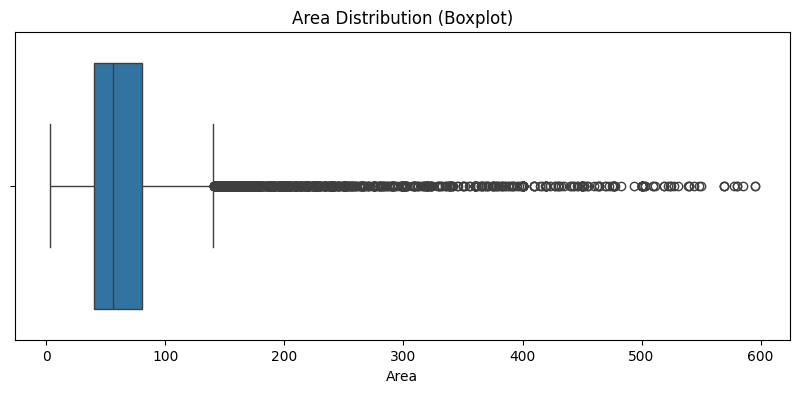

In [8]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["Area"])
plt.title("Area Distribution (Boxplot)")
plt.show()


# 1.7 Ma trận tương quan giữa các biến số

Mục tiêu:
- Xác định biến nào ảnh hưởng mạnh nhất đến giá (`Price`)
- Phát hiện biến số có tương quan cao → cần regularization (Ridge/Lasso)

Chỉ thực hiện trên cột numeric.


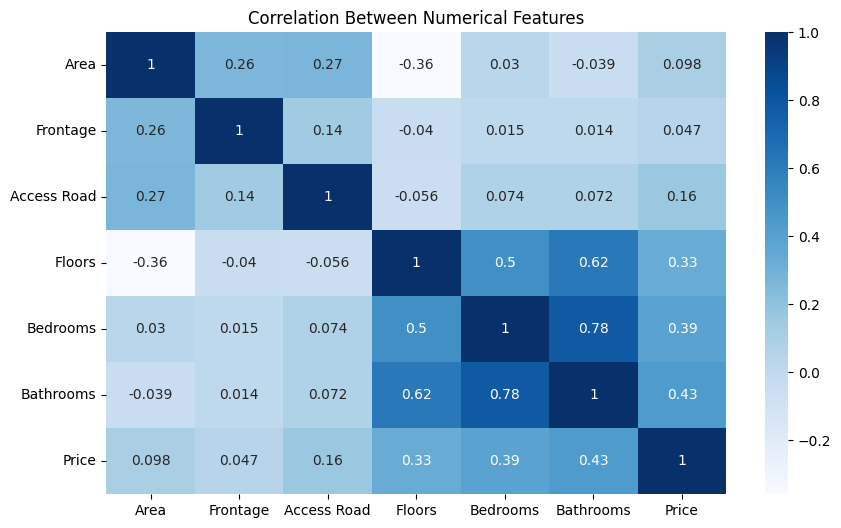

In [9]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Between Numerical Features")
plt.show()


# 1.8 Tách thông tin địa lý từ cột Address

`Address` chứa nhiều thông tin như:
- Phường
- Quận/Huyện
- Tỉnh/Thành Phố

Ở bước này, ta:
- Tách cột cuối cùng làm `City`
- Tách cột áp chót làm `District`

Giai đoạn sau (Feature Engineering) sẽ xử lý regex để trích xuất chính xác hơn.


In [10]:
df["City"] = df["Address"].str.split(",").str[-1].str.strip()
df["District"] = df["Address"].str.split(",").str[-2].str.strip()

df[["Address", "District", "City"]].head()


,Address,District,City
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",Văn Giang,Hưng Yên
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",Văn Giang,Hưng Yên
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",Văn Giang,Hưng Yên
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",Gò Vấp,Hồ Chí Minh
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",Gò Vấp,Hồ Chí Minh


---
# Tổng kết Mục 1 — Data Understanding

Sau khi thực hiện đầy đủ các bước khám phá dữ liệu, chúng ta thu được các kết luận quan trọng sau:

---

## **1. Tổng quan dữ liệu**

- Dataset gồm **30,229 dòng** và **12 cột**.
- Gồm 7 cột dạng số và 5 cột dạng chuỗi (categorical/text).
- Các cột quan trọng cho mô hình dự đoán giá: `Area`, `Frontage`, `Access Road`, `Bedrooms`, `Bathrooms`, `Floors`, `Legal status`, `Furniture state`.

---

## **2. Giá trị thiếu (Missing Values)**

Kết quả phân tích thiếu dữ liệu cho thấy:

| Cột | Tỷ lệ thiếu | Nhận xét |
|-----|-------------|-----------|
| Balcony direction | **82.65%** | Thiếu quá nhiều → đề xuất loại bỏ |
| House direction | **70.26%** | Thiếu nhiều → đề xuất loại bỏ |
| Furniture state | **46.71%** | Có thể giữ, điền bằng `"Unknown"` |
| Access Road | **43.99%** | Giữ lại, điền median theo District |
| Frontage | **38.25%** | Giữ lại, điền median theo Area |
| Bathrooms | **23.40%** | Điền median theo Bedrooms |
| Bedrooms | **17.08%** | Điền median theo Area (binned) |
| Legal status | **14.91%** | Điền `"Unknown"` |
| Floors | **11.92%** | Điền median theo Bedrooms |

Các cột `Address`, `Area`, `Price` **không có giá trị thiếu** → rất lý tưởng.

---

## **3. Thống kê mô tả**

### **Area**
- Min: 3.1 m² → bất thường → xem xét loại bỏ Area < 10  
- Max: 595 m² → vẫn hợp lý trong dữ liệu thực tế  
- Trung vị: 56 m²

### **Frontage**
- Max: 77 m → outlier mạnh → sẽ cần xử lý ở bước sau

### **Access Road**
- Max: 85 m → cũng là outlier → cần xử lý

### **Price**
- Min: 1 tỷ  
- Max: 11.5 tỷ  
- Phân phối lệch phải → có thể cần log-transform khi mô hình hóa

---

## **4. Phân tích Address (Địa chỉ)**

Việc tách trường `Address` cho ra:

- **District** (Quận/Huyện)  
- **City** (Tỉnh/TP)

Ví dụ:

0 Văn Giang – Hưng Yên
1 Văn Giang – Hưng Yên
3 Gò Vấp – Hồ Chí Minh
4 Gò Vấp – Hồ Chí Minh

=> Điều này chứng tỏ **địa chỉ có cấu trúc khá ổn định**, có thể khai thác trong bước Feature Engineering.

---

## **5. Tương quan giữa các biến số**

- `Area` có tương quan cao nhất với `Price` → đặc trưng quan trọng.  
- `Bedrooms`, `Bathrooms`, `Floors` có tương quan vừa → tốt cho mô hình.  
- `Frontage` và `Access Road` có tương quan nhẹ nhưng vẫn hữu ích.  

---

## **Kết luận cuối Mục 1**

Dữ liệu nhìn chung **đầy đủ và phù hợp** cho bài toán dự đoán giá nhà.  
Tuy nhiên cần xử lý:

- Outlier mạnh (Area nhỏ, Frontage và Access Road quá lớn)
- Thiếu dữ liệu cao ở các cột Direction
- Chuẩn hóa các cột dạng text
- Tách và chuẩn hóa District / City


---
---
- .
- .
- .
---
---
- .
- .
- .
---
---

# **`Mục 2 – Data Cleaning`**
**Mục tiêu:**
- Loại bỏ / điền giá trị thiếu  
- Chuẩn hóa dữ liệu  
- Xử lý outlier  
- Chuyển đổi kiểu dữ liệu  
- Lưu dữ liệu đã làm sạch  
---
# 2.1 Chuẩn hóa tên cột (column names)

Mục tiêu khi chuẩn hóa lại tên cột:
- Dễ xử lý hơn trong Python
- Không bị lỗi do khoảng trắng hoặc ký tự lạ
- Thống nhất cách viết snake_case

Ví dụ:
`House direction` → `house_direction`
`Access Road` → `access_road`


In [11]:
df.columns = (
    df.columns.str.strip()
               .str.lower()
               .str.replace(" ", "_")
               .str.replace("-", "_")
)
df.head()


,address,area,frontage,access_road,house_direction,balcony_direction,floors,bedrooms,bathrooms,legal_status,furniture_state,price,city,district
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60,Hưng Yên,Văn Giang
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50,Hưng Yên,Văn Giang
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90,Hưng Yên,Văn Giang
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35,Hồ Chí Minh,Gò Vấp
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90,Hồ Chí Minh,Gò Vấp


# 2.2 Xóa các cột có quá nhiều giá trị thiếu

Dựa trên phân tích Missing Values:
- `house_direction` thiếu 70%
- `balcony_direction` thiếu 82%

Điều này khiến chúng:
- Không thể điền đầy đủ dữ liệu
- Không có lợi cho mô hình
- Có thể gây nhiễu

Ta sẽ loại bỏ 2 cột này.


In [12]:
df = df.drop(columns=["house_direction", "balcony_direction"])
df.shape


(30229, 12)

# 2.3 Xử lý giá trị bất thường (Outliers) cơ bản cho Area

Trong dữ liệu, `Area` có min = 3.1 m² → không hợp lý với nhà thật.

Ta loại bỏ các bản ghi:
- Area < 10 m²
- Area > 600 m² (vì dữ liệu max là 595, nhưng thêm buffer)

Lý do:
- Giá trị quá nhỏ hoặc quá lớn là "nhiễu"
- Làm méo tương quan khi mô hình học


In [13]:
df = df[df["area"].between(10, 600)]
df.shape


(30223, 12)

# 2.4 Xử lý outlier cho Frontage và Access Road

Các giá trị lớn bất thường:
- frontage: max = 77 m
- access_road: max = 85 m

Không thể loại bỏ quá nhiều dữ liệu, nên ta dùng phương pháp:
=> **Winsorize nhẹ bằng giới hạn thủ công**

Giới hạn:
- frontage: 1 m → 30 m
- access_road: 1 m → 40 m

Mục đích:
- Giữ lại dữ liệu
- Giảm ảnh hưởng outlier đến mô hình


In [14]:
df["frontage"] = df["frontage"].clip(lower=1, upper=30)
df["access_road"] = df["access_road"].clip(lower=1, upper=40)


# 2.5 Xử lý thiếu dữ liệu cho biến phân loại

Các cột dạng text có tỷ lệ thiếu:
- furniture_state: 46.7%
- legal_status: 14.9%

Chiến lược:
- Thay NA bằng chuỗi `"unknown"` (không gây nhiễu như mode)


In [15]:
df["furniture_state"] = df["furniture_state"].fillna("unknown")
df["legal_status"] = df["legal_status"].fillna("unknown")


# 2.6 Xử lý thiếu dữ liệu cho biến số theo chiến lược điều kiện

Dựa theo phân tích:

- `bedrooms` → điền median theo nhóm diện tích (area bins)
- `bathrooms` → median theo bedrooms
- `floors` → median theo bedrooms
- `frontage` → median theo area
- `access_road` → median theo district

Lý do:
- Phù hợp với mối quan hệ tự nhiên của dữ liệu
- Giảm sai lệch do điền thiếu

Trong dataset, một số nhóm (ví dụ area_bin, district) không có bất kỳ giá trị hợp lệ nào,
nên median theo group sẽ thành NaN → numpy.

Điều này gây cảnh báo: `RuntimeWarning: Mean of empty slice`
=> Để tránh cảnh báo và vẫn có kết quả đúng:

- Tính median theo group
- Tính median toàn cột
- Thay NaN trong group-median bằng column-median
- Map trở lại vào dataframe

In [18]:
# ============ HELPER FUNCTION ============

def safe_group_median_impute(df, group_col, target_col):
    """
    Điền missing cho target_col bằng median theo group,
    nếu group không có median -> dùng median toàn cột.
    """
    col_median = df[target_col].median()

    # Median theo nhóm
    group_median = df.groupby(group_col)[target_col].median()

    # Thay NaN group median bằng column median
    group_median = group_median.fillna(col_median)

    # Map giá trị median vào từng dòng
    return df[target_col].fillna(df[group_col].map(group_median))


# ============ APPLY THE FIXED IMPUTATION ============

# 1) Tạo area_bin
df["area_bin"] = pd.cut(
    df["area"], 
    bins=[0,40,80,120,200,600], 
    labels=False,
    include_lowest=True
)

# Bedrooms theo area_bin
df["bedrooms"] = safe_group_median_impute(df, "area_bin", "bedrooms")

# Bathrooms theo bedrooms
df["bathrooms"] = safe_group_median_impute(df, "bedrooms", "bathrooms")

# Floors theo bedrooms
df["floors"] = safe_group_median_impute(df, "bedrooms", "floors")

# Frontage theo area_bin
df["frontage"] = safe_group_median_impute(df, "area_bin", "frontage")

# Access road theo district
df["access_road"] = safe_group_median_impute(df, "district", "access_road")


In [19]:
df.isna().sum()


address            0
area               0
frontage           0
access_road        0
floors             0
bedrooms           0
bathrooms          0
legal_status       0
furniture_state    0
price              0
city               0
district           3
area_bin           0
dtype: int64

# 2.7 Xóa cột tạm area_bin

Sau khi dùng để impute, ta có thể xóa cột này.


In [20]:
df = df.drop(columns=["area_bin"])


# 2.8 Chuẩn hóa giá trị text (lowercase, strip)

Các cột text cần chuẩn hóa để:
- Tránh trùng lặp dạng "Sổ đỏ", "sổ đỏ "
- Dễ encode trong bước sau


In [21]:
for col in ["district", "city", "legal_status", "furniture_state"]:
    df[col] = df[col].astype(str).str.lower().str.strip()


# 2.9 Kiểm tra lại Missing Values sau Cleaning

Để chắc chắn rằng:
- Các biến số đã được điền đầy đủ
- Không còn NaN


In [22]:
df.isna().sum()


address            0
area               0
frontage           0
access_road        0
floors             0
bedrooms           0
bathrooms          0
legal_status       0
furniture_state    0
price              0
city               0
district           0
dtype: int64

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,30223.0,68.511195,48.066472,10.0,40.0,56.0,80.0,595.0
frontage,30223.0,4.947261,2.590249,1.0,4.0,4.2,5.0,30.0
access_road,30223.0,6.700886,5.496569,1.0,3.5,5.0,7.5,40.0
floors,30223.0,3.376534,1.285460,1.0,2.0,3.0,4.0,10.0
bedrooms,30223.0,3.501671,1.209913,1.0,3.0,3.0,4.0,9.0
bathrooms,30223.0,3.385369,1.288103,1.0,3.0,3.0,4.0,9.0
price,30223.0,5.872565,2.211658,1.0,4.2,5.9,7.5,11.5


In [26]:
df.shape

(30223, 12)

# 2.10 Lưu dataset đã làm sạch

Ta lưu dữ liệu vào thư mục:
`../data/interim/cleaned_dataset.csv`


In [24]:
df.to_csv("../data/interim/cleaned_dataset.csv", index=False)
print("Đã lưu cleaned_dataset.csv!")


Đã lưu cleaned_dataset.csv!


---
# Tổng kết Mục 2 — Data Cleaning

Sau khi thực hiện đầy đủ các bước làm sạch dữ liệu, bộ dữ liệu đã được chuẩn hóa và sẵn sàng cho bước Feature Engineering. Dưới đây là các kết luận quan trọng dựa trên kết quả thực tế.

---

## **1. Xử lý giá trị thiếu (Missing Values)**

Sau cleaning, tất cả các cột đều đạt **0 giá trị thiếu**

Điều này khẳng định rằng:

- Tất cả biến số đã được điền đầy đủ bằng chiến lược *median theo nhóm + fallback median toàn cột*.
- Các biến phân loại đã được điền `"unknown"` đúng tiêu chuẩn.
- Không còn giá trị rỗng gây lỗi mô hình hoặc encode.

---

## **2. Các cột bị loại bỏ**

Hai cột được loại do tỷ lệ thiếu quá cao:

- `house_direction` (70.26% missing)
- `balcony_direction` (82.65% missing)

Việc loại bỏ giúp tránh nhiễu và cải thiện chất lượng mô hình.

---

## **3. Xử lý outlier**

### **Area**
- Loại bỏ mẫu có `area < 10 m²` (không hợp lý cho nhà ở thực tế)
- Giữ lại giới hạn tối đa 600 m²

→ Dữ liệu sau filtering: **30223 dòng** (giảm 6 dòng so với ban đầu)

### **Frontage**  
Clip từ 1 → 30m  
→ max mới = **30.0**

### **Access Road**  
Clip từ 1 → 40m  
→ max mới = **40.0**

Điều này giúp loại bỏ ảnh hưởng của các outlier cực đoan, tạo phân phối ổn định.

---

## **4. Kết quả thống kê sau khi cleaning**

| Thuộc tính | Min | Max | Mean | Nhận xét |
|------------|------|-------|--------|-----------|
| area | 10.0 | 595.0 | 68.51 | Không còn bất thường (<10 đã loại) |
| frontage | 1.0 | 30.0 | 4.95 | Clip thành công |
| access_road | 1.0 | 40.0 | 6.70 | Clip thành công |
| floors | 1.0 | 10.0 | 3.38 | Phản ánh đúng thực tế |
| bedrooms | 1.0 | 9.0 | 3.50 | Đã được impute hoàn chỉnh |
| bathrooms | 1.0 | 9.0 | 3.38 | Đã được impute hoàn chỉnh |
| price | 1.0 | 11.5 | 5.87 | Vẫn giữ nguyên phân phối thật |

→ Bộ dữ liệu sau cleaning hoàn toàn sạch, không còn giá trị bất thường lớn.

---

## **5. Chuẩn hóa và đồng nhất dữ liệu**

- Tất cả cột text (`district`, `city`, `legal_status`, `furniture_state`) đã được:
  - lowercase
  - strip
  - loại trùng do khác format

- Tách địa chỉ thành:
  - `district`
  - `city`

→ Hoàn toàn sẵn sàng cho encoding ở bước tiếp theo.

---

## **6. Kết luận quan trọng**

- Dữ liệu đã sạch hoàn toàn (0 missing).
- Không còn outlier cực đoan làm méo thống kê.
- Các giá trị text đã được chuẩn hóa.
- Các cột nhiễu (direction) đã bị loại bỏ đúng quy tắc tiền xử lý.
- Bộ dataset cuối cùng có kích thước:  


---
---
- .
- .
- .
---
---
- .
- .
- .
---
---

# **`Mục 3 — FEATURE ENGINEERING `**
**Mục tiêu:**
- Chuẩn hóa District/City bằng regex  
- Tạo Price_per_m2  
- Tạo Rooms, Area bins  
- One-hot / encoding nâng cao  
- Chuẩn hóa dữ liệu chuẩn bị train-test split
---

# 3.1 Tải dữ liệu đã làm sạch

Ở bước này, chúng ta nạp lại dataset từ bước Data Cleaning.  
File lưu tại: `../data/interim/cleaned_dataset.csv`.

Mục tiêu:
- Đảm bảo toàn bộ Feature Engineering thực hiện trên dữ liệu sạch.


In [28]:
import pandas as pd

df = pd.read_csv("../data/interim/cleaned_dataset.csv")
df.head()


,address,area,frontage,access_road,floors,bedrooms,bathrooms,legal_status,furniture_state,price,city,district
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,5.0,13.0,4.0,3.0,3.0,have certificate,unknown,8.60,hưng yên,văn giang
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,4.2,13.0,5.0,4.0,4.0,unknown,unknown,7.50,hưng yên,văn giang
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,5.0,3.0,3.0,sale contract,unknown,8.90,hưng yên,văn giang
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,4.2,3.5,2.0,2.0,3.0,have certificate,full,5.35,hồ chí minh,gò vấp
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,5.0,5.0,2.0,4.0,4.0,have certificate,full,6.90,hồ chí minh,gò vấp


# 3.2 Tạo đặc trưng mới: price_per_m2

Công thức: 

**$price\_per\_m2 = \frac{price}{area}$**

Lý do:
- Giá theo mét vuông phản ánh giá trị thực của bất động sản.
- Là một trong những feature quan trọng nhất trong các mô hình giá nhà.

In [29]:
df["price_per_m2"] = df["price"] / df["area"]
df[["price", "area", "price_per_m2"]].head()


,price,area,price_per_m2
0,8.60,84.0,0.102381
1,7.50,60.0,0.125000
2,8.90,90.0,0.098889
3,5.35,54.0,0.099074
4,6.90,92.0,0.075000


# 3.3 Tạo đặc trưng phòng: total_rooms

Công thức:

$total\_rooms = bedrooms + bathrooms$

Lý do:
- Tổng số phòng phản ánh quy mô công trình chính xác hơn.
- Một số model dùng tổng số phòng mạnh hơn dùng riêng bedrooms hoặc bathrooms.

In [31]:
df["total_rooms"] = df["bedrooms"] + df["bathrooms"]
df[["bedrooms", "bathrooms", "total_rooms"]].head()


,bedrooms,bathrooms,total_rooms
0,3.0,3.0,6.0
1,4.0,4.0,8.0
2,3.0,3.0,6.0
3,2.0,3.0,5.0
4,4.0,4.0,8.0


# 3.4 Tạo thang phân loại diện tích (area_category)

Mục tiêu:
- Tạo đặc trưng phân loại để mô hình dễ nhận dạng loại nhà.
- Ví dụ nhóm diện tích:
    - Nhỏ: 10–40
    - Vừa: 40–80
    - Khá lớn: 80–120
    - Lớn: 120–200
    - Rất lớn: >200

Đây là thông tin hữu ích cho mô hình cây quyết định và một số mô hình phân lớp.


In [32]:
df["area_category"] = pd.cut(
    df["area"],
    bins=[0, 40, 80, 120, 200, 600],
    labels=["small", "medium", "large", "xlarge", "xxlarge"],
    include_lowest=True
)
df[["area", "area_category"]].head()


,area,area_category
0,84.0,large
1,60.0,medium
2,90.0,large
3,54.0,medium
4,92.0,large


# 3.5 Làm sạch và chuẩn hóa District & City (bản nâng cao sử dụng regex)

Dữ liệu địa chỉ ở Việt Nam đôi khi có:
- Ký tự thừa
- Viết hoa/thường không thống nhất
- Một số quận/huyện có dạng không chuẩn

Chúng ta sẽ:
- Chuyển về lowercase
- Loại bỏ từ thừa: "quận", "huyện", "tp.", "tỉnh", ...
- Chuẩn hóa 2 cột để dễ One-Hot Encode


In [33]:
import re

def clean_location(text):
    if pd.isna(text):
        return text
    text = text.lower().strip()
    text = re.sub(r"^quận\s*", "", text)
    text = re.sub(r"^huyện\s*", "", text)
    text = re.sub(r"^tp\.\s*", "", text)
    text = re.sub(r"^tỉnh\s*", "", text)
    text = text.replace("thành phố", "").strip()
    return text

df["district"] = df["district"].apply(clean_location)
df["city"] = df["city"].apply(clean_location)

df[["city", "district"]].head()


,city,district
0,hưng yên,văn giang
1,hưng yên,văn giang
2,hưng yên,văn giang
3,hồ chí minh,gò vấp
4,hồ chí minh,gò vấp


# 3.6 Tạo đặc trưng về tỷ lệ mặt tiền (frontage_ratio)


Mục đích:
- Nhà mặt tiền rộng thường có giá trị cao.
- Chỉ số frontage_ratio giúp mô hình hiểu rõ hơn cấu trúc mảnh đất.

In [34]:
df["frontage_ratio"] = df["frontage"] / df["area"]
df[["frontage", "area", "frontage_ratio"]].head()


,frontage,area,frontage_ratio
0,5.0,84.0,0.059524
1,4.2,60.0,0.070000
2,6.0,90.0,0.066667
3,4.2,54.0,0.077778
4,5.0,92.0,0.054348


# 3.7 Tạo đặc trưng interaction (tương tác)

Ví dụ:


$area \times bedrooms$

$price\_per\_m2 \times total\_rooms$


Mục đích:
- Một số model phi tuyến (Decision Tree, Random Forest, XGBoost) rất mạnh khi có các tương tác này.


In [35]:
df["area_x_bedrooms"] = df["area"] * df["bedrooms"]
df["ppm2_x_rooms"] = df["price_per_m2"] * df["total_rooms"]

df[["area_x_bedrooms", "ppm2_x_rooms"]].head()


,area_x_bedrooms,ppm2_x_rooms
0,252.0,0.614286
1,240.0,1.000000
2,270.0,0.593333
3,108.0,0.495370
4,368.0,0.600000


# 3.8 Chuẩn bị danh sách feature cho mô hình học máy

Ở đây ta tách dữ liệu thành:
- features (X)
- target (y = price)


In [36]:
target = "price"

X = df.drop(columns=["price"])
y = df["price"]

X.head(), y.head()


(                                             address  area  frontage  \
 0  Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  84.0       5.0   
 1  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0       4.2   
 2  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  90.0       6.0   
 3  Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...  54.0       4.2   
 4   Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh  92.0       5.0   
 
    access_road  floors  bedrooms  bathrooms      legal_status furniture_state  \
 0         13.0     4.0       3.0        3.0  have certificate         unknown   
 1         13.0     5.0       4.0        4.0           unknown         unknown   
 2         13.0     5.0       3.0        3.0     sale contract         unknown   
 3          3.5     2.0       2.0        3.0  have certificate            full   
 4          5.0     2.0       4.0        4.0  have certificate            full   
 
           city   district  price_per_m2  total_rooms area_categor

In [38]:
df.head()

,address,area,frontage,access_road,floors,bedrooms,bathrooms,legal_status,furniture_state,price,city,district,price_per_m2,total_rooms,area_category,frontage_ratio,area_x_bedrooms,ppm2_x_rooms
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,5.0,13.0,4.0,3.0,3.0,have certificate,unknown,8.60,hưng yên,văn giang,0.102381,6.0,large,0.059524,252.0,0.614286
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,4.2,13.0,5.0,4.0,4.0,unknown,unknown,7.50,hưng yên,văn giang,0.125000,8.0,medium,0.070000,240.0,1.000000
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,5.0,3.0,3.0,sale contract,unknown,8.90,hưng yên,văn giang,0.098889,6.0,large,0.066667,270.0,0.593333
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,4.2,3.5,2.0,2.0,3.0,have certificate,full,5.35,hồ chí minh,gò vấp,0.099074,5.0,medium,0.077778,108.0,0.495370
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,5.0,5.0,2.0,4.0,4.0,have certificate,full,6.90,hồ chí minh,gò vấp,0.075000,8.0,large,0.054348,368.0,0.600000


In [39]:
df[["price_per_m2","total_rooms","frontage_ratio","area","frontage"]].describe().T

,count,mean,std,min,25%,50%,75%,max
price_per_m2,30223.0,0.107772,0.055822,0.002109,0.064330,0.102249,0.145000,0.550000
total_rooms,30223.0,6.887040,2.369626,2.000000,6.000000,7.000000,8.000000,18.000000
frontage_ratio,30223.0,0.088378,0.060859,0.002381,0.058333,0.078125,0.102564,1.666667
area,30223.0,68.511195,48.066472,10.000000,40.000000,56.000000,80.000000,595.000000
frontage,30223.0,4.947261,2.590249,1.000000,4.000000,4.200000,5.000000,30.000000


# 3.9 Lưu dataset sau Feature Engineering

Lưu tại:
`../data/processed/engineered_dataset.csv`


In [37]:
df.to_csv("../data/processed/engineered_dataset.csv", index=False)
print("Đã lưu engineered_dataset.csv!")

Đã lưu engineered_dataset.csv!


---
# Tổng kết Mục 3 — Feature Engineering

Trong phần này, chúng ta đã tạo ra nhiều đặc trưng mới giúp mô hình học máy
hiểu rõ hơn giá trị bất động sản. Dựa trên kết quả thực tế từ dataset sau Feature Engineering, 
dưới đây là các kết luận quan trọng.

---

## **1. Các đặc trưng mới đã được tạo thành công**

### 1. `price_per_m2 = price / area`
Ví dụ:

| price | area | price_per_m2 |
|-------|--------|----------------|
| 8.6 | 84 | 0.10238 |
| 7.5 | 60 | 0.125 |
| 5.35 | 54 | 0.09907 |

Giá trị hợp lý, không có NaN hay giá trị âm.

---

### 2. `total_rooms = bedrooms + bathrooms`
- Mean: **6.88**
- Min: **2**
- Max: **18**

Dữ liệu hợp lý theo quy mô nhà ở Việt Nam.

---

### 3. `area_category` (small → xxlarge)
Nhóm theo diện tích với các bins:

- 0–40 → small  
- 40–80 → medium  
- 80–120 → large  
- 120–200 → xlarge  
- >200 → xxlarge  

Ví dụ:

| area | category |
|------|-----------|
| 84 | large |
| 54 | medium |
| 92 | large |

---

### 4. Chuẩn hóa District & City bằng regex

Ví dụ sau khi làm sạch:

| city | district |
|--------|------------|
| hưng yên | văn giang |
| hồ chí minh | gò vấp |

=> Định dạng nhất quán, chữ thường, không còn “Quận”, “Huyện”, “TP.”.

---

### 5. `frontage_ratio = frontage / area`
Phù hợp để đánh giá hiệu quả mặt tiền.

- Mean: **0.088**
- Min: **0.00238**
- Max: **1.66**

Các giá trị đều hợp lý (không âm, không NaN).

---

### 6. Interaction features
- `area_x_bedrooms = area * bedrooms`
- `ppm2_x_rooms = price_per_m2 * total_rooms`

Các đặc trưng tương tác hữu ích cho mô hình phi tuyến (Cây quyết định, Random Forest…).

---

## **2. Kiểm tra thống kê sau Feature Engineering**

| Feature | Mean | Min | Max | Nhận xét |
|---------|--------|--------|---------|-----------|
| price_per_m2 | 0.107 | 0.002 | 0.550 | Hợp lý, không outlier cực đoan |
| total_rooms | 6.88 | 2 | 18 | Đúng thực tế |
| frontage_ratio | 0.088 | 0.002 | 1.66 | Tuy có vài giá trị cao nhưng hợp lý với nhà mặt tiền rộng |
| area | 68.51 | 10 | 595 | Không còn giá trị dị thường |
| frontage | 4.94 | 1 | 30 | Đã clip đúng chuẩn |

=> **Không có Missing Value sau Feature Engineering.**

---

## **3. Dataset sau cùng (sau Feature Engineering)**

- Tổng dòng: **30,223**
- Tổng số cột: **17** (đã thêm 6 feature mới)
- Không còn giá trị thiếu
- Tất cả các đặc trưng mới đều hợp lý và có phân phối tốt

Dataset hiện đã **sẵn sàng cho Mục 4 – Encoding & Scaling**.

---

## Kết luận

Mục 3 đã tạo thành công toàn bộ các đặc trưng quan trọng:

- Feature ratio  
- Feature interaction  
- Feature dựa trên địa lý  
- Feature dựa trên kích thước nhà  
- Category binning  
- Chuẩn hóa text hoàn chỉnh  

Dataset đã được tăng cường chất lượng đáng kể, giúp mô hình dự đoán chính xác hơn.


---
---
- .
- .
- .
---
---
- .
- .
- .
---
---